# Quick introduction to Jupyter notebook

to run Jupyter notebook in your terminal type: <br>
    `jupyter notebook`
    
**Esc** : takes you into command mode, there you can use:

 -  __a__ : insert a new cell above <br>
 -  __b__ : insert a new cell below <br>
 -  **m** : change the current cell to Markdown <br>
 -  **y** : change the current cell to code

**Enter** : go back to edit mode
    
**Shift + Enter** : execute the cell, move to the cell below

# 1. Introduction to numpy

__numpy array__ <br>
NumPy array is a data container. It is similar to Python lists, but it’s specialised for working on numerical data. NumPy is at the center of scientific Python ecosystem and it is a work-horse of many scientific libraries including scikit-learn, scikit-image, matplotlib, SciPy.

In general you should use this library if you want to do fancy things with **numbers**, especially if you have **matrices** or **arrays.** <br>

To use NumPy we need to start python interpreter and import numpy package:

In [1]:
import numpy as np

Let's create a simple numpy array

In [2]:
x = np.array([2, 1, 5])
print(x)

[2 1 5]


### Lists vs Numpy arrays

The Python core library provides Lists. A list is the Python equivalent of an array, but it is resizeable and can contain elements of different types.

Pros of an array:
 - **Size** - Numpy data structures take up less space
 - **Performance** - faster than lists
 - **Functionality** - SciPy and NumPy have optimized functions such as linear algebra operations built in.

### Memory layout

NumPy array is just a memory block with extra information how to interpret its contents. 

To construct an array with pre-defined elements we can also use one of the built-in helper functions:

__np.arange__ works like Python built-in range, but it returns an array; 

In [3]:
np.arange(5)

array([0, 1, 2, 3, 4])

__np.ones__ and __np.zeros__ return arrays of 0s or 1s; 

In [4]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [5]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

__np.random.rand__ creates an array of random numbers from an interval [0, 1]:

In [6]:
np.random.rand(5)

array([0.16924351, 0.88918881, 0.51646384, 0.21877348, 0.74427805])

We can also construct a two- or more dimensional arrays:

In [7]:
np.array([[1, 2], [5, 6]])

array([[1, 2],
       [5, 6]])

In [8]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

Alternatively, a n-dimensional array can be obtained by reshaping a 1-D array:

In [9]:
a = np.arange(12)
a.reshape(4,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## 2. Working with a dataset

We will use first dataset called `inflammation-01.csv` from the data provided by Software Carpentry: [Analyzing Patient Data](https://swcarpentry.github.io/python-novice-inflammation-2.7/). <br>
You should be able to find it in your `data/` directory. 

`numpy.loadtxt` has two parameters: the name of the file we want to read and the delimiter that separates values on a line. These both need to be character strings.

In [10]:
data = np.loadtxt(fname='../data/inflammation-01.csv', delimiter=',')

We are studying inflammation in patients who have been given a new treatment for arthritis, and need to analyze the first dozen data sets of their daily inflammation. The data sets are stored in comma-separated values (CSV) format: each row holds information for a single patient, and the columns represent successive days:

### Explore array

In [11]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In contrast to lists NumPy arrays can store elements of pre-determined type only.
The type function will only tell you that a variable is a NumPy array but won’t tell you the type of thing inside the array. We can find out the type of the data contained in the NumPy array.

In [12]:
print(data.dtype)

float64


and the shape of the array

In [13]:
print(data.shape)

(60, 40)


meaning that data array variable contains 60 rows and 40 columns

## Plotting the data

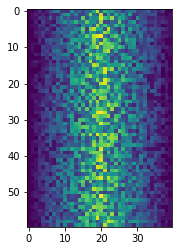

In [14]:
import matplotlib.pyplot as plt
plt.imshow(data)
plt.show()

In [15]:
%matplotlib inline  

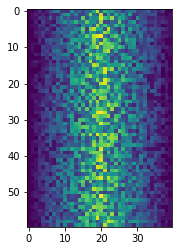

In [16]:
plt.imshow(data)

## Indexing

If we want to get a single number from the array, we must provide an index in square brackets after the variable name. <br>
Note that the NumPy arrays are zero-indexed:

In [17]:
data[0, 0]

0.0

It means that that the third element in the first row has an index of [0, 2]:

In [18]:
data[0, 2]

1.0

We can also assign the element with a new value:

In [19]:
data[0, 2] = 100.
print(data[0, 2])

100.0


NumPy (and Python in general) checks the bounds of the array:

In [20]:
print(data.shape)

(60, 40)


Finally, we can ask for several elements at once:

In [21]:
data[0, [0, 10]]

array([0., 3.])

## $\color{green}{\text{Excercise 1}}$

Generate a 10 x 3 array of random numbers (using np.random.rand). From each row, find the column index of the element closest to 0.75. Make use of np.abs and np.argmin. The result should be a one-dimensional array of integers from 0 to 2.

## $\color{blue}{\text{Answer}}$

In [22]:
rand_array = np.random.rand(10,3)
rand_array2 = rand_array - 0.75
closest = np.argmin(np.abs(rand_array2),1)
print(rand_array)
print(closest)

[[0.84299469 0.21624969 0.39024739]
 [0.49479276 0.07880216 0.63698504]
 [0.76876651 0.69004893 0.8585796 ]
 [0.23718491 0.55380824 0.81839782]
 [0.36628706 0.56736557 0.902662  ]
 [0.25351106 0.66687083 0.81894421]
 [0.33303099 0.32809745 0.02107101]
 [0.35147715 0.25889972 0.91532234]
 [0.05995225 0.45708599 0.95573259]
 [0.33957986 0.33024036 0.51669165]]
[0 2 0 2 2 2 0 2 2 2]


## 3. Filtering data
It's also possible to select elements (filter) based on a condition. 

Sometimes we may want to select array elements based on their values. For this case boolean mask is very useful. The mask is an array of the same length as the indexed array containg only False or True values:

In [23]:
a = np.arange(4)
print(a)

[0 1 2 3]


In [24]:
mask = np.array([False, True, True, False])

In [25]:
a[mask]

array([1, 2])

In most cases the mask is constructed from the values of the array itself. For example, to select only odd numbers we could use the following mask:

In [26]:
odd = (a % 2) == 1
odd

array([False,  True, False,  True])

In [27]:
np.array([False,  True, False,  True], dtype=bool)
a[odd]

array([1, 3])

This could be also done in a single step:

In [28]:
a[(a % 2) == 1]

array([1, 3])

## $\color{green}{\text{Excercise 2}}$ Filtering data
In the `data` what do you have to do to select all measurements above 10 in the first patient (index 0)?

## $\color{blue}{\text{Answer}}$

In [29]:
patient0_data = data[0, :]
patient0_data[patient0_data>10]

array([100.,  12.,  18.,  13.,  11.,  11.])

We can also substitute the measurement with a new value:

In [30]:
patient1_data = data[1, :]
patient1_data[patient1_data>10] = 10
print(patient1_data)

[ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6. 10. 10.  5.  9.  4.  4.  7. 10.
  8.  6. 10.  4. 10.  5. 10.  7. 10.  5. 10.  3.  3.  5.  4.  4.  5.  5.
  1.  1.  0.  1.]


## Copy and view

When the contents are physically stored in another location, it is called __Copy__. If on the other hand, a different view of the same memory content is provided, we call it as __View__.

__view__ : it is another way of viewing the data of the array
 
__copy__ : it does not share allocated memory with the original array

## $\color{green}{\text{Excercise 3}}$ view or a copy
Is `patient_data` view or a copy of `data`?

## $\color{blue}{\text{Answer}}$

To check that let's make a little test:

In [31]:
# take the third patient and print it
print(data[2, :])
# assign a variable from data to patient2_data
patient2_data = data[2, :]
# we will now update the new variable
patient2_data[patient2_data>10] = 10
print(patient2_data)
# was original data also update?
print(data[2,:])
# yes. That means that patient2_data is a view of the data. They point to the same memory

[ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.  5.  7.  4.  5.  4. 15.  5. 11.
  9. 10. 19. 14. 12. 17.  7. 12. 11.  7.  4.  2. 10.  5.  4.  2.  2.  3.
  2.  2.  1.  1.]
[ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.  5.  7.  4.  5.  4. 10.  5. 10.
  9. 10. 10. 10. 10. 10.  7. 10. 10.  7.  4.  2. 10.  5.  4.  2.  2.  3.
  2.  2.  1.  1.]
[ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.  5.  7.  4.  5.  4. 10.  5. 10.
  9. 10. 10. 10. 10. 10.  7. 10. 10.  7.  4.  2. 10.  5.  4.  2.  2.  3.
  2.  2.  1.  1.]


## $\color{green}{\text{Quiz}}$  view or copy
What are the final values of a and b at the end of the following program? Explain why.

`a = np.arange(5)
b = a[a < 3]
b[::2] = 0`


a)  a = [0, 1, 2, 3, 4], b = [0, 1, 2] <br>
b)  a = [0, 1, 0, 3, 4], b = [0, 1, 0] <br>
c)  a = [0, 0, 2, 3, 4], b = [0, 0, 2] <br>
d)  a = [0, 1, 2, 3, 4], b = [0, 1, 0] <br>
e)  a = [0, 1, 2, 3, 4], b = [0, 1, 0, 3, 0] <br>

## $\color{blue}{\text{Answer}}$

In [32]:
# b is a copy of a
a = np.arange(5)
b = a[a < 3]
b[::2] = 0
print(a)
print(b)

[0 1 2 3 4]
[0 1 0]


## 4. Slices

You can select ranges of elements using slices. 

To select first two columns from the first row, you can use:

In [33]:
data[0, 0:2]

array([0., 0.])

In [34]:
data[0, :2]

array([0., 0.])

If you omit both indices in the slice leaving out only the colon (:), you will get all columns of this row:

In [35]:
data[0, :]

array([  0.,   0., 100.,   3.,   1.,   2.,   4.,   7.,   8.,   3.,   3.,
         3.,  10.,   5.,   7.,   4.,   7.,   7.,  12.,  18.,   6.,  13.,
        11.,  11.,   7.,   7.,   4.,   6.,   8.,   8.,   4.,   4.,   5.,
         7.,   3.,   4.,   2.,   3.,   0.,   0.])

Note that the returned array does not include third column (with index 2). The slice 0:2 means, “Start at index 0 and go up to, but not including, index 2.”

You can skip the first or last index (which means, take the values from the beginning or to the end):

You can also slice at both dimensions

In [36]:
print(data[5:10, 0:10])

[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]]


## $\color{green}{\text{Excercise 4}}$

Select rows 0 through 2 and columns 36 through to the end of the array.

## $\color{blue}{\text{Answer}}$

In [37]:
data[:3, 36:]

array([[2., 3., 0., 0.],
       [1., 1., 0., 1.],
       [2., 2., 1., 1.]])

## $\color{green}{\text{Quiz 2}}$ 

Imagine the following array a:

`>> print(a)` <br>
[0, 5, 8, 10]

Which of the following commands will give this output:

[5, 8]

a) print(a[1, 2])

b) print(a[2:3])

c) print(a[1:2])

d) print(a[[1, 2]])

e) print(a[a<10])

You can test your guess by creating the a array:

a = np.array([0, 5, 8, 10])

You can assign elements with slices and indexes:

In [38]:
a = np.arange(9)
print(a)

[0 1 2 3 4 5 6 7 8]


In [39]:
a[1:8:2]=1000
print(a)

[   0 1000    2 1000    4 1000    6 1000    8]


## $\color{green}{\text{Excercise 5}}$ view or copy

Create a 3x4 array of values from 0 to 11. Create another array as follows: y = x[2]. What happens when you modify y — does x also change?<br>
Now try y = x[:2] and modify it’s first element. What happens now?

## $\color{blue}{\text{Answer}}$

In [40]:
x = np.arange(0,12)
y = x[2]
print(x)
y = 10
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [41]:
y = x[:2]
y[0] = 10
print(x)

[10  1  2  3  4  5  6  7  8  9 10 11]


## $\color{green}{\text{Excercise 6}}$ checkerboard
    
Create 8x8 array of zeros and fill it with a checkerboard pattern . 
You can use plt.imshow() to visualize your array


<img src="../images/checkerboard.svg"  width=400 height=400>

## $\color{blue}{\text{Answer}}$

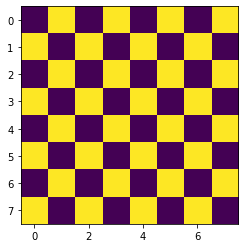

In [42]:
import matplotlib.pylab as plt
%matplotlib inline

checkerboard = np.zeros((8,8))
checkerboard[1::2,::2] = 1
checkerboard[::2,1::2] = 1
plt.imshow(checkerboard)

## 5. Operations

Arrays also know how to perform common mathematical operations on their values. The simplest operations with data are arithmetic: addition, subtraction, multiplication, and division. When you do such operations on arrays, the operation is done element-by-element. <br>

In [43]:
doubledata = data + data
print(doubledata)

[[  0.   0. 200. ...   6.   0.   0.]
 [  0.   2.   4. ...   2.   0.   2.]
 [  0.   2.   2. ...   4.   2.   2.]
 ...
 [  0.   2.   2. ...   2.   2.   2.]
 [  0.   0.   0. ...   0.   4.   0.]
 [  0.   0.   2. ...   2.   2.   0.]]


Operations by scalar:

In [44]:
tripledata = data * 3
print(tripledata)

[[  0.   0. 300. ...   9.   0.   0.]
 [  0.   3.   6. ...   3.   0.   3.]
 [  0.   3.   3. ...   6.   3.   3.]
 ...
 [  0.   3.   3. ...   3.   3.   3.]
 [  0.   0.   0. ...   0.   6.   0.]
 [  0.   0.   3. ...   3.   3.   0.]]


One of the advantages of NumPy is that it allows to apply functions (called ufuncs) to all elements of an array without the need of `for` loops:

In [45]:
np.sin(data[0,:])

array([ 0.        ,  0.        , -0.50636564,  0.14112001,  0.84147098,
        0.90929743, -0.7568025 ,  0.6569866 ,  0.98935825,  0.14112001,
        0.14112001,  0.14112001, -0.54402111, -0.95892427,  0.6569866 ,
       -0.7568025 ,  0.6569866 ,  0.6569866 , -0.53657292, -0.75098725,
       -0.2794155 ,  0.42016704, -0.99999021, -0.99999021,  0.6569866 ,
        0.6569866 , -0.7568025 , -0.2794155 ,  0.98935825,  0.98935825,
       -0.7568025 , -0.7568025 , -0.95892427,  0.6569866 ,  0.14112001,
       -0.7568025 ,  0.90929743,  0.14112001,  0.        ,  0.        ])

This is not only convenient but also more efficient than iterating through the elements using for loops.

In [46]:
expdata = np.exp(data)
print(expdata)

[[1.00000000e+00 1.00000000e+00 2.68811714e+43 ... 2.00855369e+01
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.71828183e+00 7.38905610e+00 ... 2.71828183e+00
  1.00000000e+00 2.71828183e+00]
 [1.00000000e+00 2.71828183e+00 2.71828183e+00 ... 7.38905610e+00
  2.71828183e+00 2.71828183e+00]
 ...
 [1.00000000e+00 2.71828183e+00 2.71828183e+00 ... 2.71828183e+00
  2.71828183e+00 2.71828183e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  7.38905610e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 2.71828183e+00 ... 2.71828183e+00
  2.71828183e+00 1.00000000e+00]]


**Warning** Standard Python installation also includes the `math` library, but it does not play nicely with NumPy array and it may give different results than numpy function, so avoid using it with NumPy arrays.

Some functions (such as mean, max, etc.) aggregate the data return arrays of less dimensions or scalars:

In [47]:
sumdata = np.sum(data)
print('sum data: {}'.format(sumdata))

sum data: 14804.0


In [48]:
meandata = np.mean(data)
print(meandata)

6.168333333333333


It's also possbile to average over a single axis:

In [49]:
np.mean(data, 0)

array([ 0.        ,  0.45      ,  2.76666667,  1.75      ,  2.43333333,
        3.15      ,  3.8       ,  3.88333333,  5.23333333,  5.51666667,
        5.95      ,  5.88333333,  8.35      ,  7.73333333,  8.36666667,
        9.41666667,  9.58333333, 10.51666667, 11.56666667, 12.35      ,
       12.96666667, 11.9       , 10.96666667, 10.05      ,  9.96666667,
        8.63333333,  9.11666667,  7.25      ,  7.31666667,  6.58333333,
        6.06666667,  5.95      ,  5.11666667,  3.6       ,  3.3       ,
        3.56666667,  2.48333333,  1.5       ,  1.13333333,  0.56666667])

## $\color{green}{\text{Excercise 7}}$ operations

Average the inflammation data over the first ten patients (rows) and plot them across time (columns). Then repeat it for the next ten patients and so on. Try putting all averages on a single plot

## $\color{blue}{\text{Answer}}$

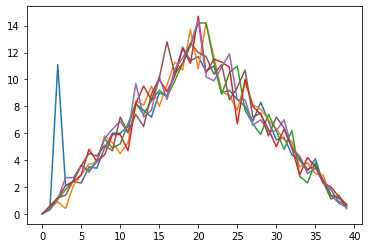

In [50]:
import matplotlib.pylab as plt
%matplotlib inline

pat_0 = 0
pat_last = 10
while pat_last <= len(data):
    ave_inflammation = np.mean(data[pat_0:pat_last], axis=0)
    plt.plot(ave_inflammation)
    pat_0 = pat_last
    pat_last += 10
    

# 6. Case study: K-means

K-means is a simple algorithm to cluster data – that is to identify groups of similar objects based only on their properties. The algorithm is best-illustrated by the following graph:

<img src="../images/kmeans_illustration.png" alt="drawing" width=800 >



## Loading data

We first need to load sample data

In [51]:
import numpy as np
import matplotlib.pylab as plt

data = np.loadtxt('../data/kmeans_data.csv')
data.shape

(30, 2)

To visualise the data we can use the scatter function from matplotlib package:

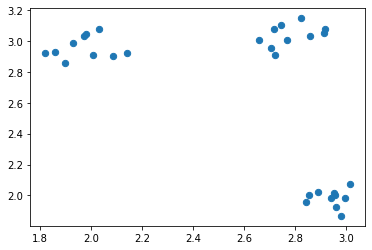

In [52]:
plt.scatter(data[:, 0], data[:, 1], s=40)

## Initialisation

In the first step of the algorithm we need to initialise the centers of the clusters. We will initialise them randomly but consistently with the mean and standard deviation of the data:

In [53]:
K = 3
centroids = np.random.randn(K, 2)

To center the cluster centroids on the data it’s better to normalise to the mean and standard deviation of the data:

In [54]:
centroids = centroids * np.std(data, 0)
centroids = centroids + np.mean(data, 0)

Let’s now plot the data and the random cluster centers on the same figure:

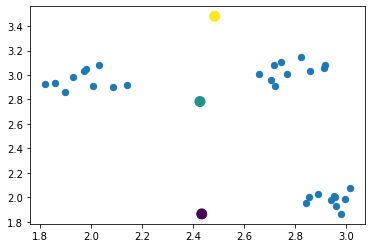

In [55]:
plt.scatter(data[:, 0], data[:, 1], s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(3), s=100)

We now need to assign each point to the closest cluster center. <br> First, we will calculate the Euclidean distance of each point to each of the centers. <br>

For this we can use the [broadcasting](broadcasting.ipynb).

The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations.  Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [56]:
data.shape

(30, 2)

In [57]:
centroids.shape

(3, 2)

In [58]:
data[:, np.newaxis, :].shape

(30, 1, 2)

In [59]:
deltas = data[:, np.newaxis, :] - centroids

In [60]:
deltas.shape

(30, 3, 2)

In [61]:
distances = np.sqrt(np.sum((deltas) ** 2, 2))

For each data point we find the center with minimum distance. We can use the argmin method with the axis argument:

In [62]:
closest = distances.argmin(1)

Now we plot the centroids and data points with the color-code reflecting cluster membership:

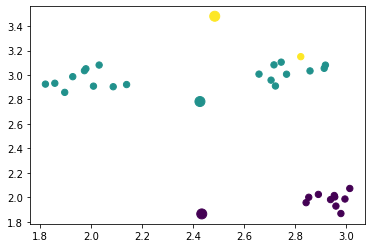

In [63]:
plt.scatter(data[:, 0], data[:, 1], s=40, c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(3), s=100)

## $\color{green}{\text{Excercise 8}}$  Calculate new cluster centers
Given the array of cluster assignments closest calculate the center coordinates of the first cluster (index 0). <br> __Note__: To calculate new centers of the clusters, we average all points belonging to that cluster. We can use a boolean mask

## $\color{blue}{\text{Answer}}$

In [64]:
data[closest==0, :].mean(0)

array([2.9389042 , 1.98285156])

To repeat it for all clusters we can use a for loop or list comprehension. Since the number of clusters is usually much smaller than the number of data points, this for loop won’t affect the performance of our algorithm:

In [65]:
centroids = np.array([data[closest == i, :].mean(0) for i in range(3)])

Lets check the positions of new centers and assignment of points to clusters.

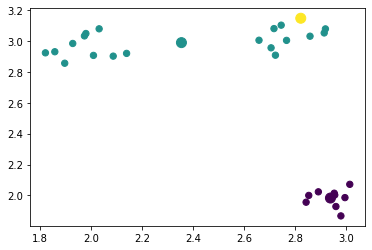

In [66]:
plt.scatter(data[:, 0], data[:, 1], s=40, c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(3), s=100)

## Iterations

Now we can repeat the steps of assigning point to clusters and updating the cluster centers iteratively and watch the progress of the algorithm:

In [67]:
for iteration in range(5):
   # assign points to clusters
   deltas = data[:, np.newaxis, :] - centroids
   distances = np.sqrt(np.sum((deltas) ** 2, 2))
   closest = distances.argmin(1)

   # calculate new centroids
   centroids = np.array([data[closest == i, :].mean(0) for i in range(3)])

## Single cluster?
Note that sometimes the algorithm can produce degenerate results – all of the points will be assigned to a single cluster (or final number of clusters will be less than K). This is one of drawbacks of K-means with random initialisations. A possible solution is to repeat the algorithm with other initialisations and find the best cluster assignment, but better solutions exist.

## Putting it all together

Our final script will look as the following:

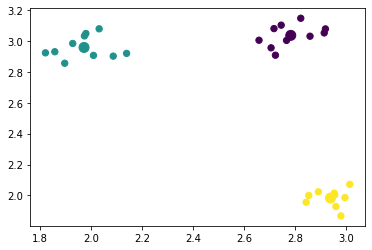

In [68]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('../data/kmeans_data.csv')

# randomly initalize the centroids
K = 3
centroids = np.random.randn(K, 2)
centroids = centroids * np.std(data, 0)
centroids = centroids + np.mean(data, 0)

for iteration in range(5):
   # assign points to clusters
   deltas = data[:, np.newaxis, :] - centroids
   distances = np.sqrt(np.sum((deltas) ** 2, 2))
   closest = distances.argmin(1)

   # calculate new centroids
   centroids = np.array([data[closest == i, :].mean(0) for i in range(K)])

# plot 
plt.scatter(data[:, 0], data[:, 1], s=40, c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(K), s=100)

## $\color{green}{\text{Excercise 9}}$  Stopping criterion
After each iteration test whether any point changes their cluster membership. Stop the algorithm if convergence was reached i.e. clusters do not change after the re-assignment step.

## $\color{green}{\text{Excercise 10}}$ Choice of K

Check whether the algorithm works for any K. Try using K > 3. What happens then?

/var/folders/m4/pscnc70n11zckwm64q2hnd6w0000gn/T/ipykernel_92991/2257258359.py:19: RuntimeWarning: Mean of empty slice.
  centroids_new = np.array([data[closest == i, :].mean(0) for i in range(K)])
/Users/owkin/miniconda3/envs/demo/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


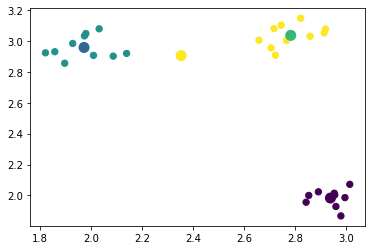

In [69]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('../data/kmeans_data.csv')

# randomly initalize the centroids
K = 4
centroids = np.random.randn(K, 2)
centroids = centroids * np.std(data, 0)
centroids = centroids + np.mean(data, 0)

for iteration in range(5):
   # assign points to clusters
   deltas = data[:, np.newaxis, :] - centroids
   distances = np.sqrt(np.sum((deltas) ** 2, 2))
   closest = distances.argmin(1)

   # calculate new centroids
   centroids_new = np.array([data[closest == i, :].mean(0) for i in range(K)])
   centroids_new[np.isnan(centroids_new)] = centroids[np.isnan(centroids_new)]
   centroids = centroids_new

# plot 
plt.scatter(data[:, 0], data[:, 1], s=40, c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(K), s=100)